In this file, we are going to test if the original reference from the raw data actually show any meaningful periodicity

In [2]:
cd

/home/luxx0489


In [1]:
# import packages
import numpy as np
import mne
import pandas as pd
import matplotlib.pyplot as plt
import pickle

from mne.io import read_raw_edf
from mne.viz import plot_evoked_topo, plot_evoked
from scipy.signal import welch,periodogram
from anlffr import spectral
from scipy.io import loadmat, savemat
from matplotlib.colors import from_levels_and_colors

#%matplotlib qt

/home/luxx0489/.conda/envs/mne/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


Extracting EDF parameters from /home/luxx0489/jupyter_projects/MultiChannelSSSR/EEG_data_100_200Hz/Sub2/Sub2_TMR-5_ENH_LF.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8015871  =      0.000 ...  1957.000 secs...
Trigger channel has a non-zero initial value of 130944 (consider using initial_event=True to detect this event)
1500 events found
Event IDs: [65409 65410]
1500 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 1500 events and 6145 original time points ...
0 bad epochs dropped


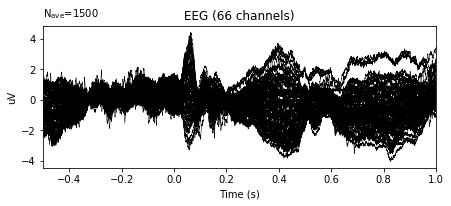

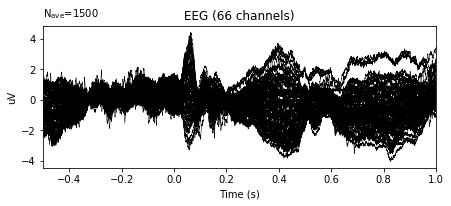

In [11]:
sub_id = 'Sub2'
folder_path = "./jupyter_projects/MultiChannelSSSR/EEG_data_100_200Hz/"

raw = mne.io.read_raw_bdf(folder_path + sub_id + '/' + sub_id + '_TMR-5_ENH_LF.bdf',
                               stim_channel='Status', preload=True, exclude = ['EXG3','EXG4','EXG5','EXG6','EXG7','EXG8'])
events = mne.find_events(raw)

epochs = mne.Epochs(raw,events=events, tmin=-0.5, tmax=1)
epochs.load_data()

epochs.average().plot()

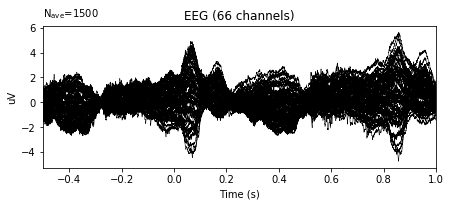

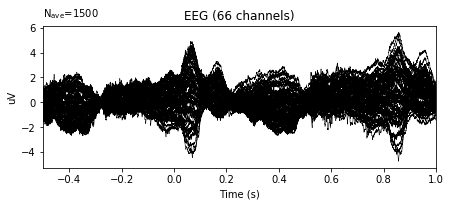

Extracting EDF parameters from /home/luxx0489/jupyter_projects/MultiChannelSSSR/EEG_data_100_200Hz/Sub2/Sub2_TMR-5_MSK_LF.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 4911103  =      0.000 ...  1199.000 secs...
Trigger channel has a non-zero initial value of 65408 (consider using initial_event=True to detect this event)
1500 events found
Event IDs: [65409 65410]
1500 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 1500 events and 6145 original time points ...
0 bad epochs dropped
EEG channel type selected for re-referencing
Applying a custom EEG reference.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.


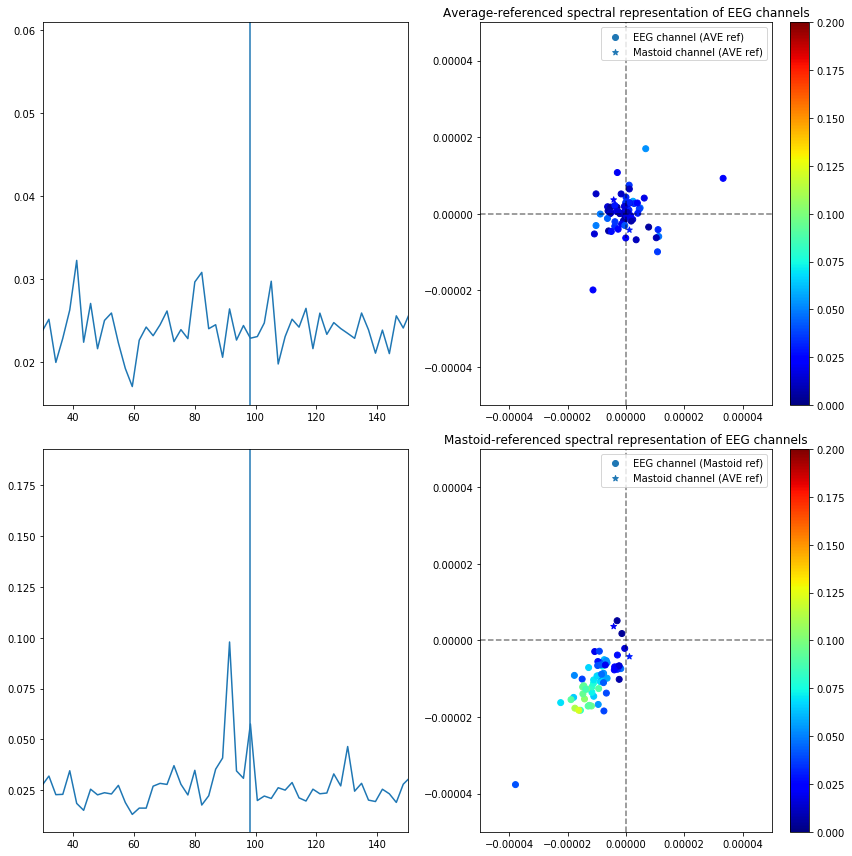

In [3]:

for iSubject in [2]:# range(2,18):

    folder_path = "./jupyter_projects/MultiChannelSSSR/EEG_data_100_200Hz/"
    sub_id = 'Sub' + str(iSubject)
    raw = mne.io.read_raw_bdf(folder_path + sub_id + '/' + sub_id + '_TMR-5_MSK_LF.bdf',
                                   stim_channel='Status', preload=True, exclude = ['EXG3','EXG4','EXG5','EXG6','EXG7','EXG8'])
    events = mne.find_events(raw)

    epochs = mne.Epochs(raw,events=events, tmin=-0.5, tmax=1)
    epochs.load_data()
    ep_m = epochs.copy().set_eeg_reference(ref_channels=['EXG1','EXG2'])
    ep_a = epochs.copy().set_eeg_reference(ref_channels='average')

    data = ep_a.get_data()[:,:,int(np.round((0.5)*4096)):int(np.round((0.5)*4096))]
    xw_a = np.fft.rfft(np.hamming(data.shape[2])*data, axis=2)

    data = ep_m.get_data()[:,:,int(np.round((0.5)*4096)):int(np.round((0.5+0.43752)*4096))]   
    xw_m = np.fft.rfft(np.hamming(data.shape[2])*data, axis=2)
    
    freq = np.fft.rfftfreq(data.shape[2],1/4096)
    index = np.argmin(abs(freq-98.28))

    plt.figure(figsize=(12,12))

    plt.subplot(2,2,1)
    plv_a = abs((xw_a/abs(xw_a)).mean(0))
    plt.plot(freq,plv_a[0:64,:].mean(0))
    plt.xlim(30,150)
    plt.axvline(x=freq[index])
    
    plt.subplot(2,2,2)
    phase_a=xw_a.mean(0)[:,index]

    plt.scatter(np.real(phase_a[0:64]),np.imag(phase_a[0:64]),label='EEG channel (AVE ref)',c=plv_a[0:64,index],
                cmap='jet',vmin=0,vmax=0.2)
    plt.scatter(np.real(phase_a[64:66]),np.imag(phase_a[64:66]),label='Mastoid channel (AVE ref)',c=plv_a[64:66,index],
               cmap='jet',vmin=0,vmax=0.2,marker='*')
    plt.axvline(x=0,linestyle='--',alpha=0.5,color='k')
    plt.axhline(y=0,linestyle='--',alpha=0.5,color='k')
    plt.xlim(-0.00005,0.00005)
    plt.ylim(-0.00005,0.00005)
    plt.legend()
    plt.title('Average-referenced spectral representation of EEG channels')
    plt.colorbar()

    #=================

    plt.subplot(2,2,3)
    plv_m = abs((xw_m/abs(xw_m)).mean(0))
    plt.plot(freq,plv_m[0:64,:].mean(0))
    plt.xlim(30,150)
    plt.axvline(x=freq[index])



    plt.subplot(2,2,4)

    phase_m=xw_m.mean(0)[:,index]

    plt.scatter(np.real(phase_m[0:64]),np.imag(phase_m[0:64]),label='EEG channel (Mastoid ref)',c=plv_m[0:64,index],
                cmap='jet',vmin=0,vmax=0.2)
    plt.scatter(np.real(phase_a[64:66]),np.imag(phase_a[64:66]),label='Mastoid channel (AVE ref)',c=plv_a[64:66,index],
               cmap='jet',vmin=0,vmax=0.2,marker='*')
    plt.axvline(x=0,linestyle='--',alpha=0.5,color='k')
    plt.axhline(y=0,linestyle='--',alpha=0.5,color='k')
    plt.xlim(-0.00005,0.00005)
    plt.ylim(-0.00005,0.00005)
    plt.legend()
    plt.title('Mastoid-referenced spectral representation of EEG channels')
    plt.colorbar()

    plt.tight_layout()
    plt.show()

Extracting EDF parameters from /home/luxx0489/jupyter_projects/MultiChannelSSSR/EEG_data_100_200Hz/Sub2/Sub2_TMR-5_MSK_LF.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 4911103  =      0.000 ...  1199.000 secs...
Trigger channel has a non-zero initial value of 65408 (consider using initial_event=True to detect this event)
1500 events found
Event IDs: [65409 65410]
1500 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 1500 events and 6145 original time points ...
0 bad epochs dropped
EEG channel type selected for re-referencing
Applying a custom EEG reference.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.


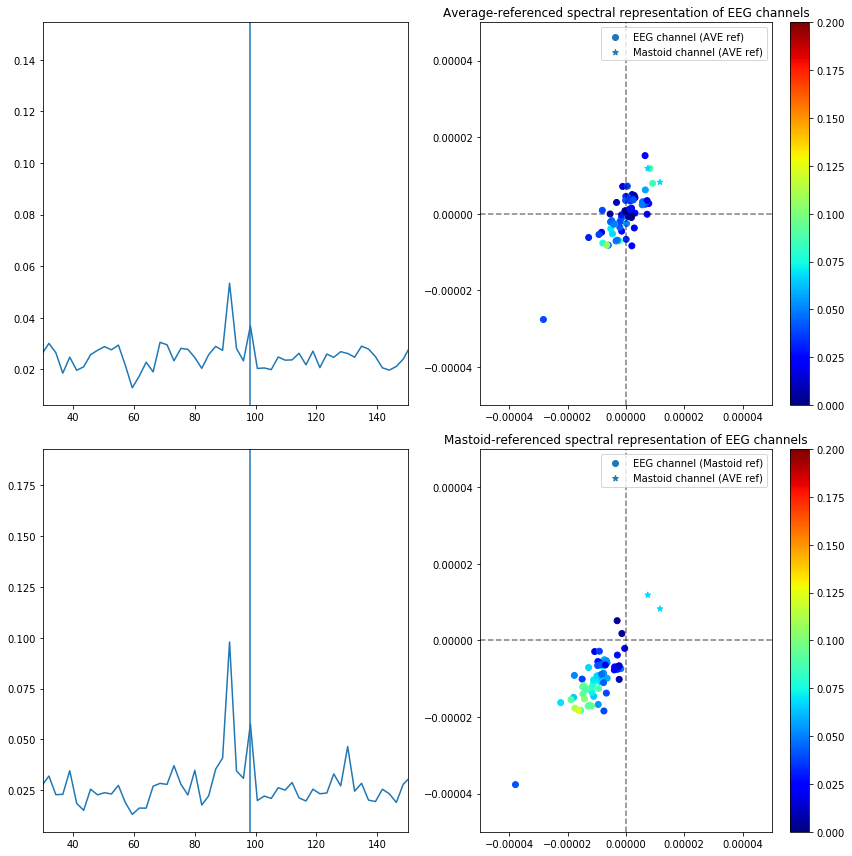

In [12]:

for iSubject in [2]:# range(2,18):

    folder_path = "./jupyter_projects/MultiChannelSSSR/EEG_data_100_200Hz/"
    sub_id = 'Sub' + str(iSubject)
    raw = mne.io.read_raw_bdf(folder_path + sub_id + '/' + sub_id + '_TMR-5_MSK_LF.bdf',
                                   stim_channel='Status', preload=True, exclude = ['EXG3','EXG4','EXG5','EXG6','EXG7','EXG8'])
    events = mne.find_events(raw)

    epochs = mne.Epochs(raw,events=events, tmin=-0.5, tmax=1)
    epochs.load_data()
    ep_m = epochs.copy().set_eeg_reference(ref_channels=['EXG1','EXG2'])
    ep_a = epochs.copy().set_eeg_reference(ref_channels='average')

    data = ep_a.get_data()[:,:,int(np.round((0.5)*4096)):int(np.round((0.5+0.43752)*4096))]
    xw_a = np.fft.rfft(np.hamming(data.shape[2])*data, axis=2)

    data = ep_m.get_data()[:,:,int(np.round((0.5)*4096)):int(np.round((0.5+0.43752)*4096))]   
    xw_m = np.fft.rfft(np.hamming(data.shape[2])*data, axis=2)
    
    freq = np.fft.rfftfreq(data.shape[2],1/4096)
    index = np.argmin(abs(freq-98.28))

    plt.figure(figsize=(12,12))

    plt.subplot(2,2,1)
    plv_a = abs((xw_a/abs(xw_a)).mean(0))
    plt.plot(freq,plv_a[0:64,:].mean(0))
    plt.xlim(30,150)
    plt.axvline(x=freq[index])
    
    plt.subplot(2,2,2)
    phase_a=xw_a.mean(0)[:,index]

    plt.scatter(np.real(phase_a[0:64]),np.imag(phase_a[0:64]),label='EEG channel (AVE ref)',c=plv_a[0:64,index],
                cmap='jet',vmin=0,vmax=0.2)
    plt.scatter(np.real(phase_a[64:66]),np.imag(phase_a[64:66]),label='Mastoid channel (AVE ref)',c=plv_a[64:66,index],
               cmap='jet',vmin=0,vmax=0.2,marker='*')
    plt.axvline(x=0,linestyle='--',alpha=0.5,color='k')
    plt.axhline(y=0,linestyle='--',alpha=0.5,color='k')
    plt.xlim(-0.00005,0.00005)
    plt.ylim(-0.00005,0.00005)
    plt.legend()
    plt.title('Average-referenced spectral representation of EEG channels')
    plt.colorbar()

    #=================

    plt.subplot(2,2,3)
    plv_m = abs((xw_m/abs(xw_m)).mean(0))
    plt.plot(freq,plv_m[0:64,:].mean(0))
    plt.xlim(30,150)
    plt.axvline(x=freq[index])



    plt.subplot(2,2,4)

    phase_m=xw_m.mean(0)[:,index]

    plt.scatter(np.real(phase_m[0:64]),np.imag(phase_m[0:64]),label='EEG channel (Mastoid ref)',c=plv_m[0:64,index],
                cmap='jet',vmin=0,vmax=0.2)
    plt.scatter(np.real(phase_a[64:66]),np.imag(phase_a[64:66]),label='Mastoid channel (AVE ref)',c=plv_a[64:66,index],
               cmap='jet',vmin=0,vmax=0.2,marker='*')
    plt.axvline(x=0,linestyle='--',alpha=0.5,color='k')
    plt.axhline(y=0,linestyle='--',alpha=0.5,color='k')
    plt.xlim(-0.00005,0.00005)
    plt.ylim(-0.00005,0.00005)
    plt.legend()
    plt.title('Mastoid-referenced spectral representation of EEG channels')
    plt.colorbar()

    plt.tight_layout()
    plt.show()

In [52]:
plv_a[0:64,index]

array([0.07911782, 0.10399977, 0.19596487, 0.29210969, 0.18523676,
       0.07382681, 0.04669519, 0.09111486, 0.12105168, 0.19980783,
       0.27354827, 0.15467351, 0.10322591, 0.05275757, 0.05494131,
       0.08635006, 0.05454201, 0.05218682, 0.06925815, 0.0613264 ,
       0.10060503, 0.11080141, 0.1542731 , 0.28287572, 0.09031826,
       0.1121501 , 0.10670743, 0.06851379, 0.12987168, 0.11688701,
       0.06920067, 0.05035329, 0.11065785, 0.04289007, 0.09507354,
       0.16692528, 0.19800661, 0.33415668, 0.3006819 , 0.23374748,
       0.13991131, 0.13587257, 0.15108672, 0.12327816, 0.20528507,
       0.23974384, 0.24590866, 0.17164424, 0.15832445, 0.10580036,
       0.06060596, 0.11763715, 0.44158303, 0.1747838 , 0.0730622 ,
       0.01347542, 0.0668055 , 0.11839361, 0.2023711 , 0.33522215,
       0.53977844, 0.14228013, 0.11204629, 0.07652036])

Extracting EDF parameters from /home/luxx0489/jupyter_projects/MultiChannelSSSR/EEG_data_100_200Hz/Sub2/Sub2_TMR-5_MSK_HF.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 5255167  =      0.000 ...  1283.000 secs...
Trigger channel has a non-zero initial value of 130944 (consider using initial_event=True to detect this event)
1500 events found
Event IDs: [65409 65410]
1500 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 1500 events and 4097 original time points ...
0 bad epochs dropped
EEG channel type selected for re-referencing
Applying a custom EEG reference.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.


/home/luxx0489/.conda/envs/mne/lib/python3.7/site-packages/ipykernel_launcher.py:43: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


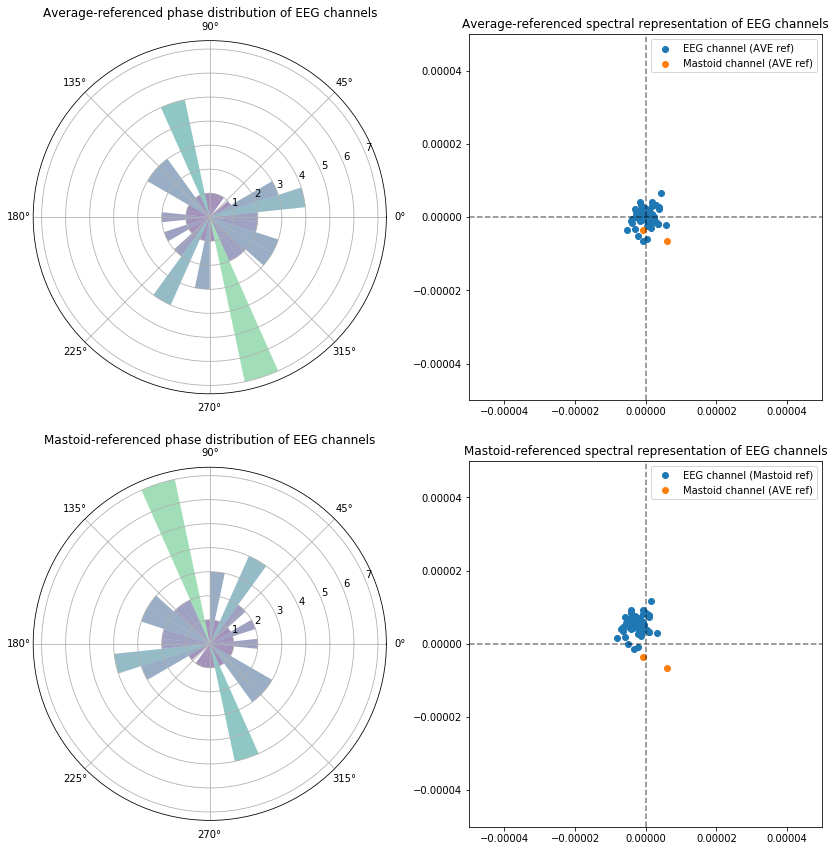

Extracting EDF parameters from /home/luxx0489/jupyter_projects/MultiChannelSSSR/EEG_data_100_200Hz/Sub3/Sub3_TMR-5_MSK_HF.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 4898815  =      0.000 ...  1196.000 secs...
Trigger channel has a non-zero initial value of 130944 (consider using initial_event=True to detect this event)
1500 events found
Event IDs: [65409 65410]
1500 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 1500 events and 4097 original time points ...
0 bad epochs dropped
EEG channel type selected for re-referencing
Applying a custom EEG reference.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.


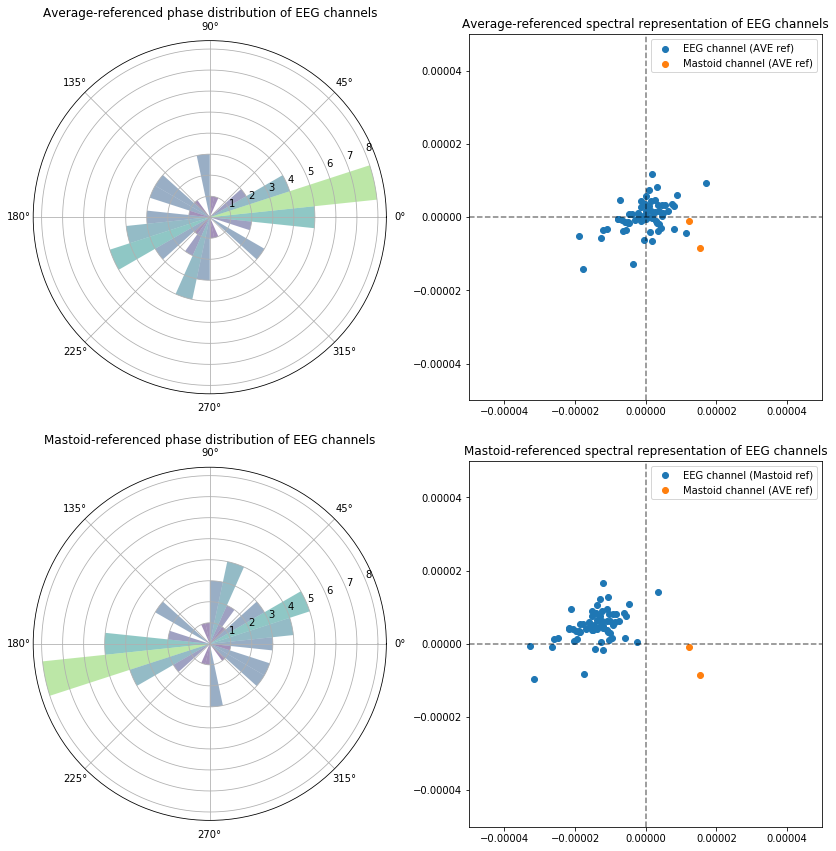

Extracting EDF parameters from /home/luxx0489/jupyter_projects/MultiChannelSSSR/EEG_data_100_200Hz/Sub4/Sub4_TMR-5_MSK_HF.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 4771839  =      0.000 ...  1165.000 secs...
Trigger channel has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
1500 events found
Event IDs: [1 2]
1500 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 1500 events and 4097 original time points ...
0 bad epochs dropped
EEG channel type selected for re-referencing
Applying a custom EEG reference.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.


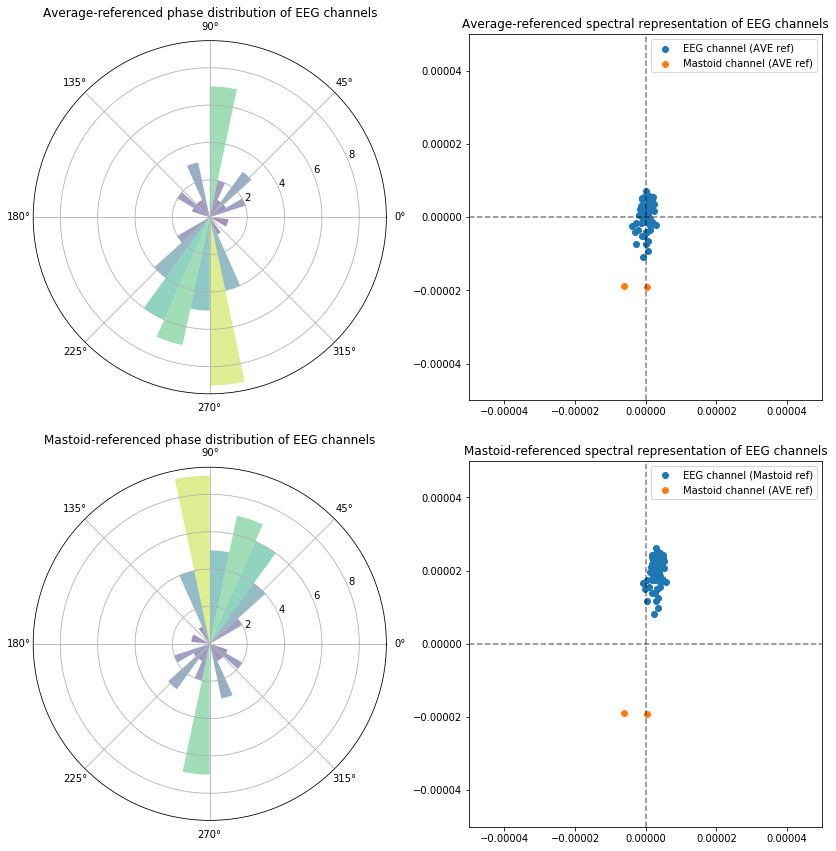

Extracting EDF parameters from /home/luxx0489/jupyter_projects/MultiChannelSSSR/EEG_data_100_200Hz/Sub5/Sub5_TMR-5_MSK_HF.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 4816895  =      0.000 ...  1176.000 secs...
1500 events found
Event IDs: [1 2]
1500 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 1500 events and 4097 original time points ...
0 bad epochs dropped
EEG channel type selected for re-referencing
Applying a custom EEG reference.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.


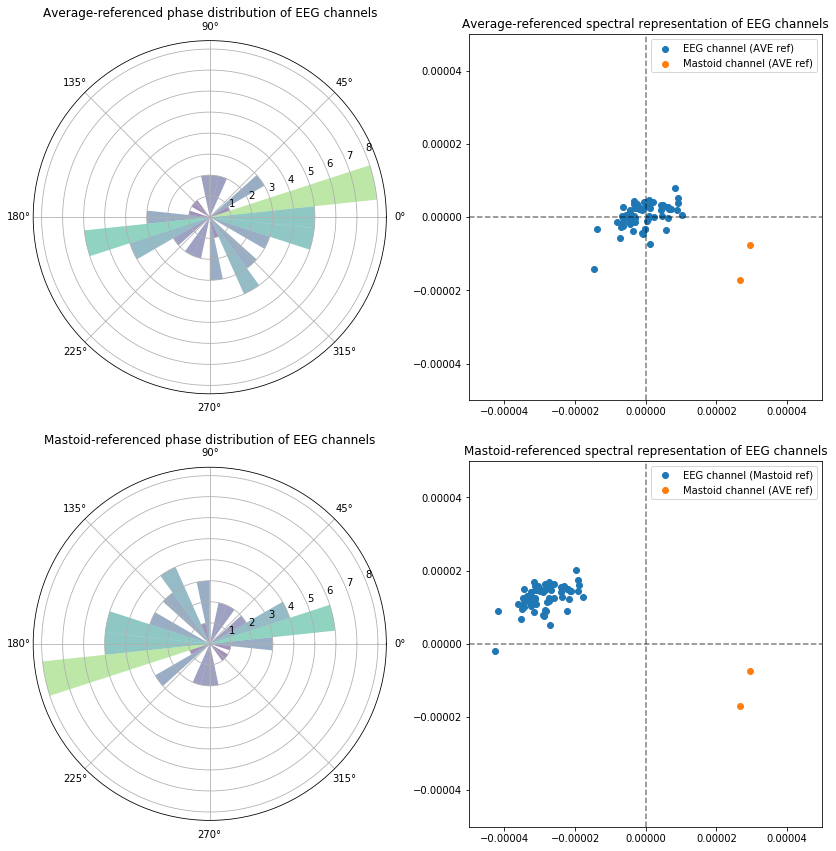

Extracting EDF parameters from /home/luxx0489/jupyter_projects/MultiChannelSSSR/EEG_data_100_200Hz/Sub6/Sub6_TMR-5_MSK_HF.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 4804607  =      0.000 ...  1173.000 secs...
Trigger channel has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
1500 events found
Event IDs: [1 2]
1500 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 1500 events and 4097 original time points ...
0 bad epochs dropped
EEG channel type selected for re-referencing
Applying a custom EEG reference.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.


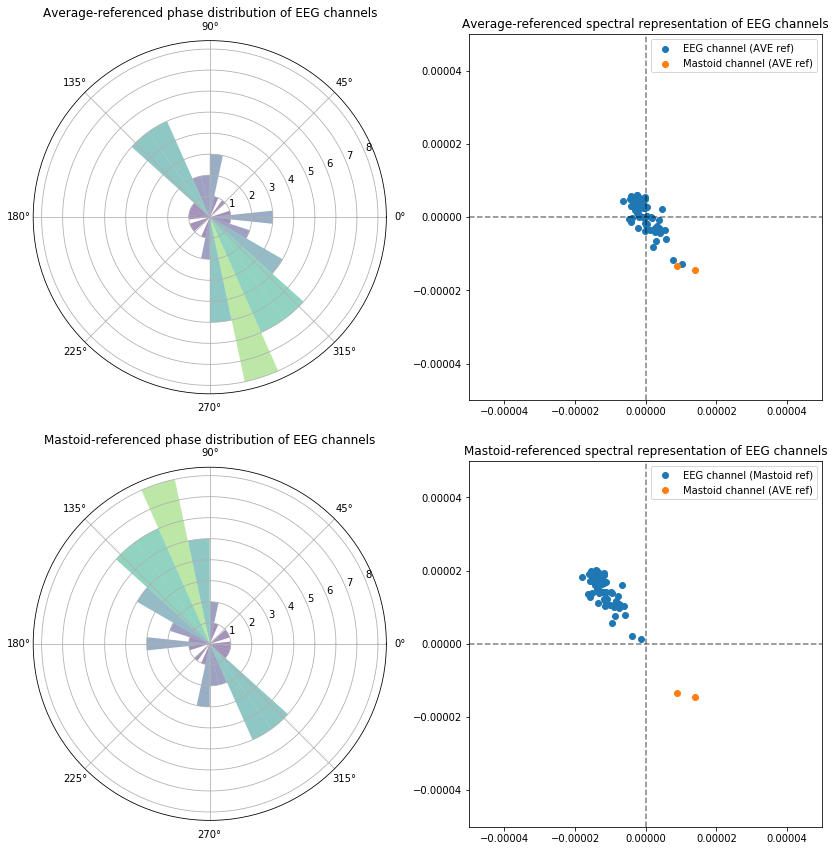

Extracting EDF parameters from /home/luxx0489/jupyter_projects/MultiChannelSSSR/EEG_data_100_200Hz/Sub7/Sub7_TMR-5_MSK_HF.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 4796415  =      0.000 ...  1171.000 secs...
Trigger channel has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
1500 events found
Event IDs: [1 2]
1500 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 1500 events and 4097 original time points ...
0 bad epochs dropped
EEG channel type selected for re-referencing
Applying a custom EEG reference.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.


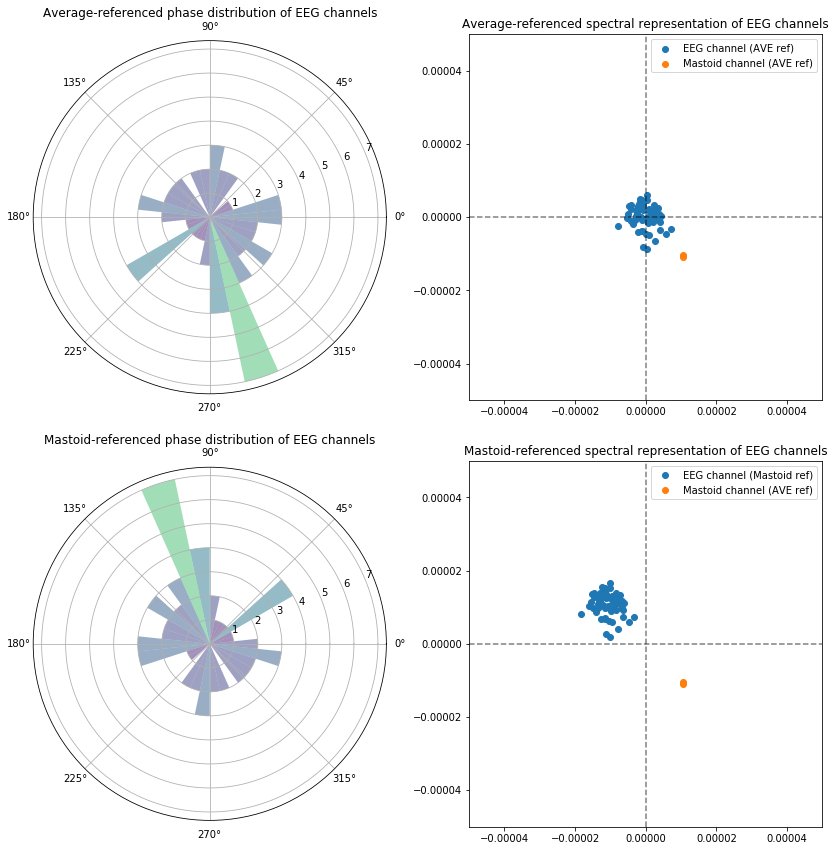

Extracting EDF parameters from /home/luxx0489/jupyter_projects/MultiChannelSSSR/EEG_data_100_200Hz/Sub8/Sub8_TMR-5_MSK_HF.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 4808703  =      0.000 ...  1174.000 secs...
Trigger channel has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
1500 events found
Event IDs: [1 2]
1500 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 1500 events and 4097 original time points ...
0 bad epochs dropped
EEG channel type selected for re-referencing
Applying a custom EEG reference.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.


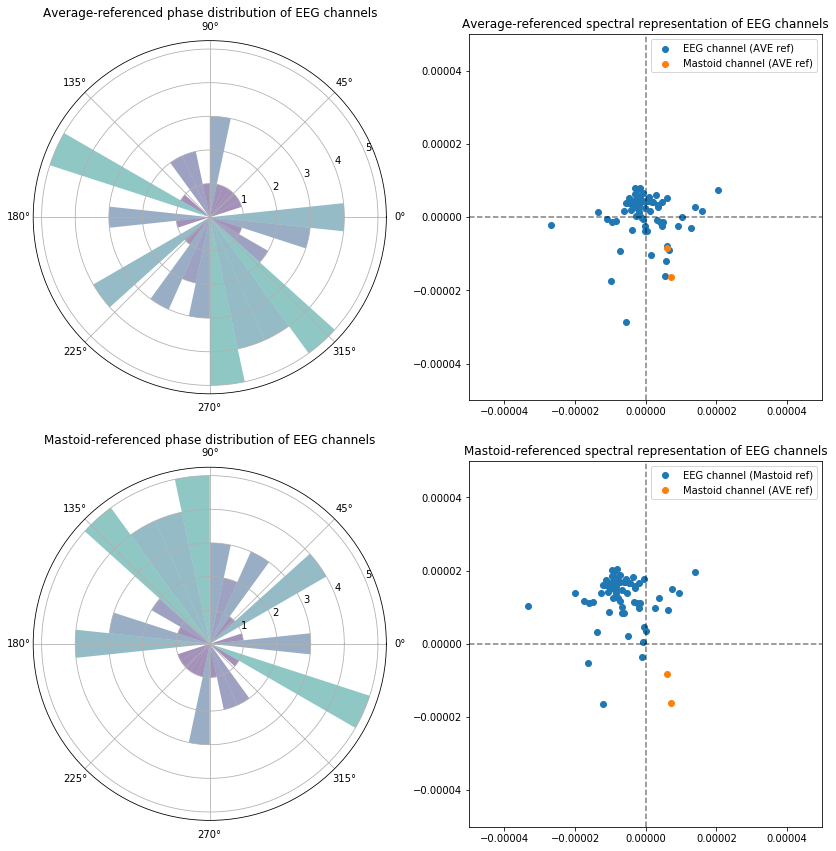

Extracting EDF parameters from /home/luxx0489/jupyter_projects/MultiChannelSSSR/EEG_data_100_200Hz/Sub9/Sub9_TMR-5_MSK_HF.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 4870143  =      0.000 ...  1189.000 secs...
Trigger channel has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
1500 events found
Event IDs: [1 2]
1500 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 1500 events and 4097 original time points ...
0 bad epochs dropped
EEG channel type selected for re-referencing
Applying a custom EEG reference.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.


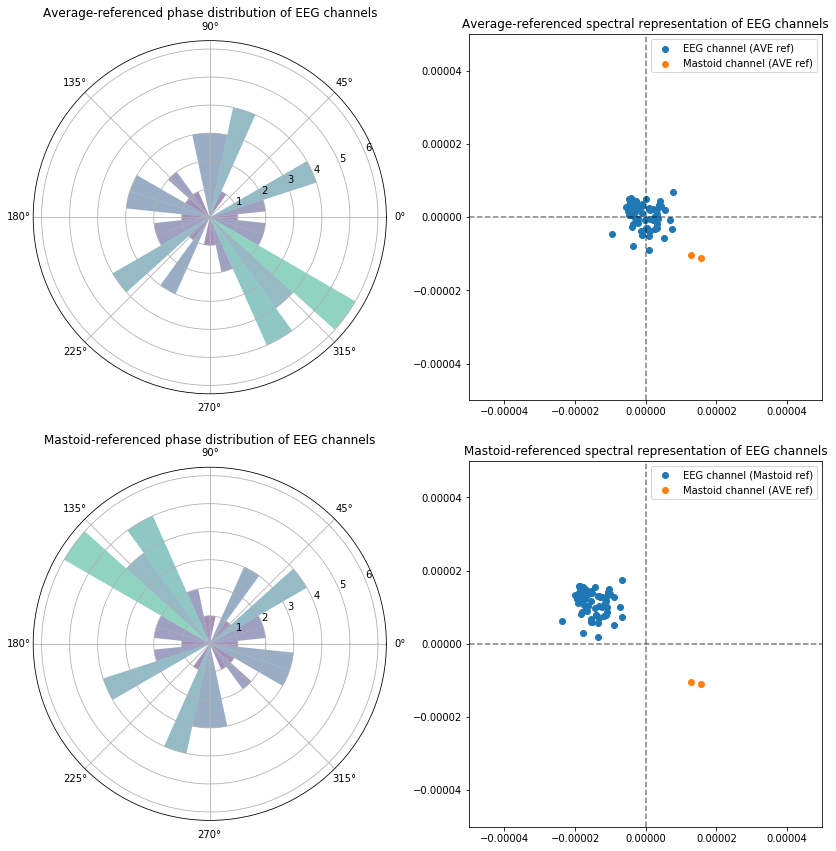

Extracting EDF parameters from /home/luxx0489/jupyter_projects/MultiChannelSSSR/EEG_data_100_200Hz/Sub10/Sub10_TMR-5_MSK_HF.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 4775935  =      0.000 ...  1166.000 secs...
Trigger channel has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
1500 events found
Event IDs: [1 2]
1500 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 1500 events and 4097 original time points ...
0 bad epochs dropped
EEG channel type selected for re-referencing
Applying a custom EEG reference.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.


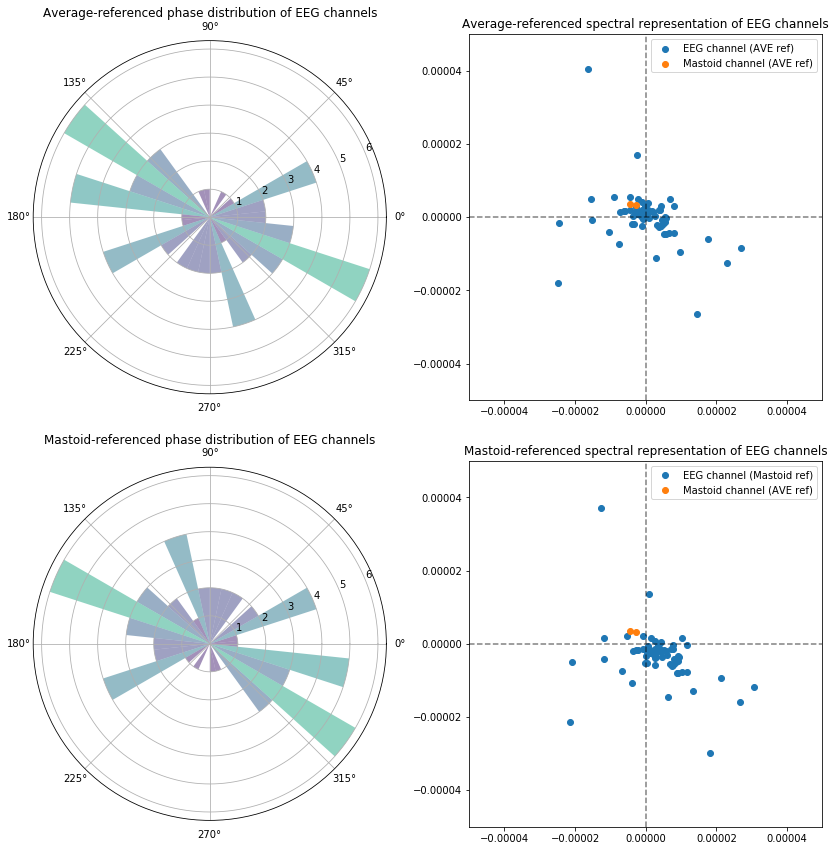

Extracting EDF parameters from /home/luxx0489/jupyter_projects/MultiChannelSSSR/EEG_data_100_200Hz/Sub11/Sub11_TMR-5_MSK_HF.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 4771839  =      0.000 ...  1165.000 secs...
1500 events found
Event IDs: [1 2]
1500 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 1500 events and 4097 original time points ...
0 bad epochs dropped
EEG channel type selected for re-referencing
Applying a custom EEG reference.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.


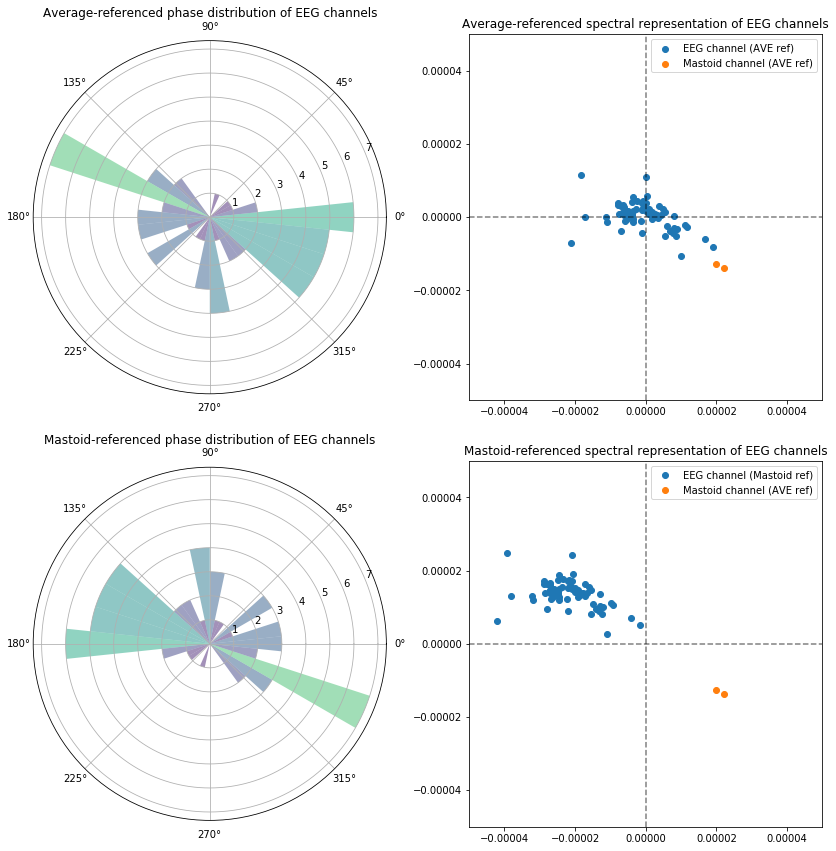

Extracting EDF parameters from /home/luxx0489/jupyter_projects/MultiChannelSSSR/EEG_data_100_200Hz/Sub12/Sub12_TMR-5_MSK_HF.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 4788223  =      0.000 ...  1169.000 secs...
Trigger channel has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
1500 events found
Event IDs: [1 2]
1500 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 1500 events and 4097 original time points ...
0 bad epochs dropped
EEG channel type selected for re-referencing
Applying a custom EEG reference.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.


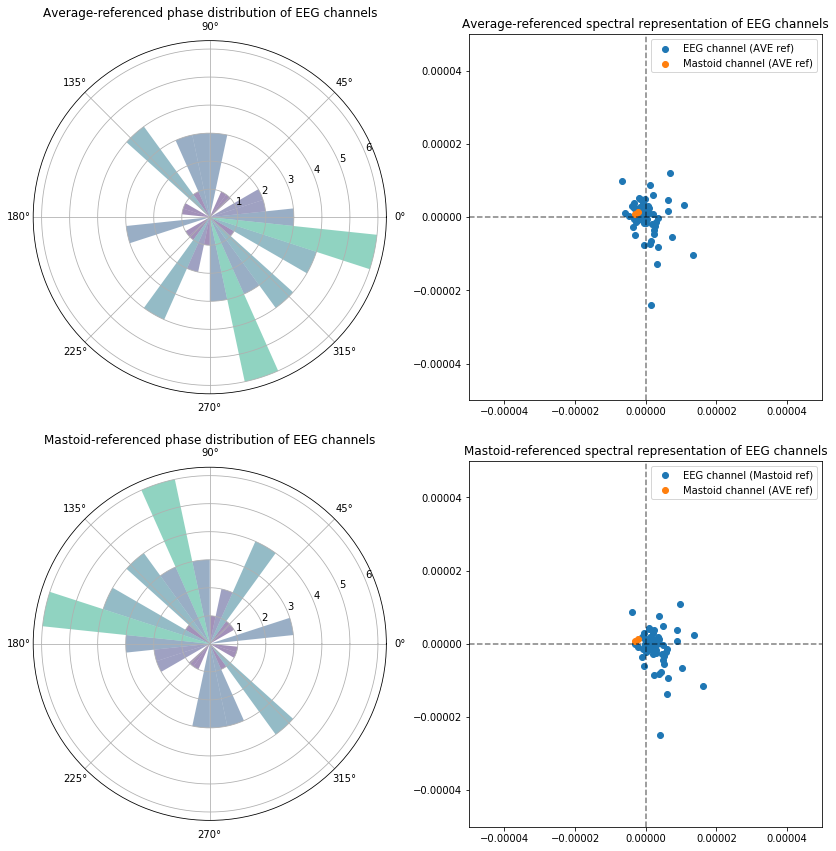

Extracting EDF parameters from /home/luxx0489/jupyter_projects/MultiChannelSSSR/EEG_data_100_200Hz/Sub13/Sub13_TMR-5_MSK_HF.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 4861951  =      0.000 ...  1187.000 secs...
Trigger channel has a non-zero initial value of 130944 (consider using initial_event=True to detect this event)
1500 events found
Event IDs: [65409 65410]
1500 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 1500 events and 4097 original time points ...
0 bad epochs dropped
EEG channel type selected for re-referencing
Applying a custom EEG reference.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.


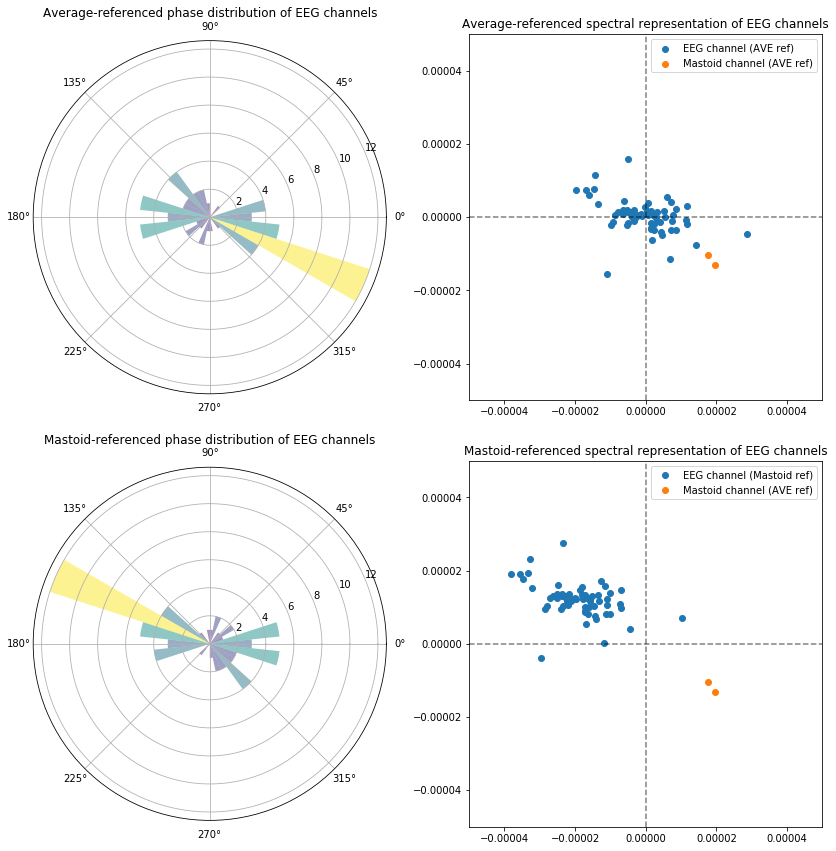

Extracting EDF parameters from /home/luxx0489/jupyter_projects/MultiChannelSSSR/EEG_data_100_200Hz/Sub14/Sub14_TMR-5_MSK_HF.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 4788223  =      0.000 ...  1169.000 secs...
Trigger channel has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
1500 events found
Event IDs: [1 2]
1500 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 1500 events and 4097 original time points ...
0 bad epochs dropped
EEG channel type selected for re-referencing
Applying a custom EEG reference.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.


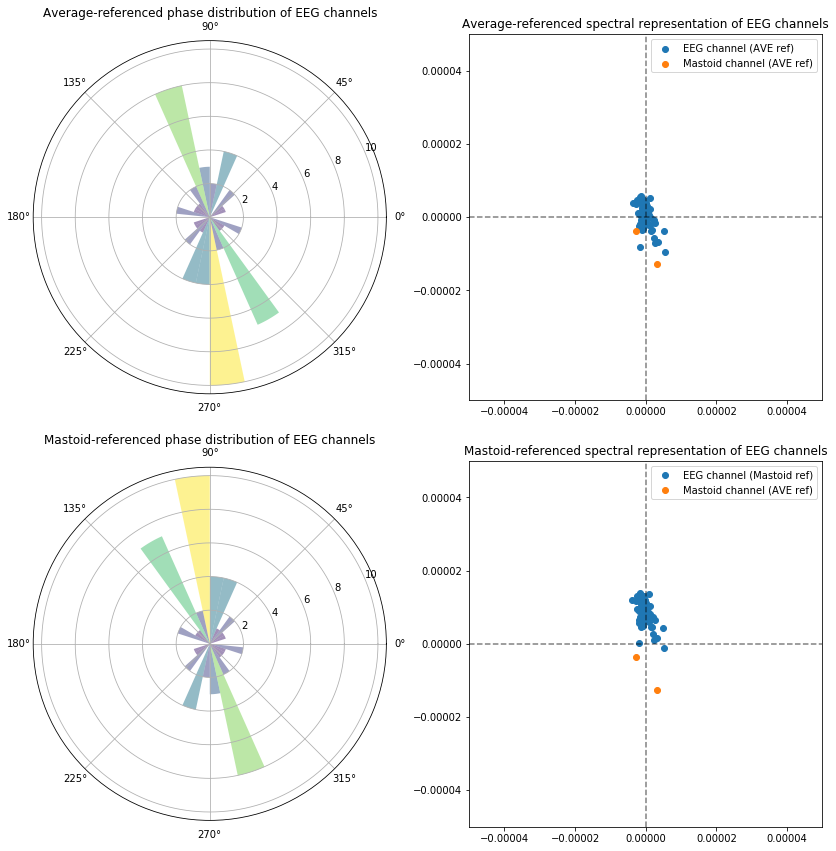

Extracting EDF parameters from /home/luxx0489/jupyter_projects/MultiChannelSSSR/EEG_data_100_200Hz/Sub15/Sub15_TMR-5_MSK_HF.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 4886527  =      0.000 ...  1193.000 secs...
Trigger channel has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
1500 events found
Event IDs: [1 2]
1500 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 1500 events and 4097 original time points ...
0 bad epochs dropped
EEG channel type selected for re-referencing
Applying a custom EEG reference.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.


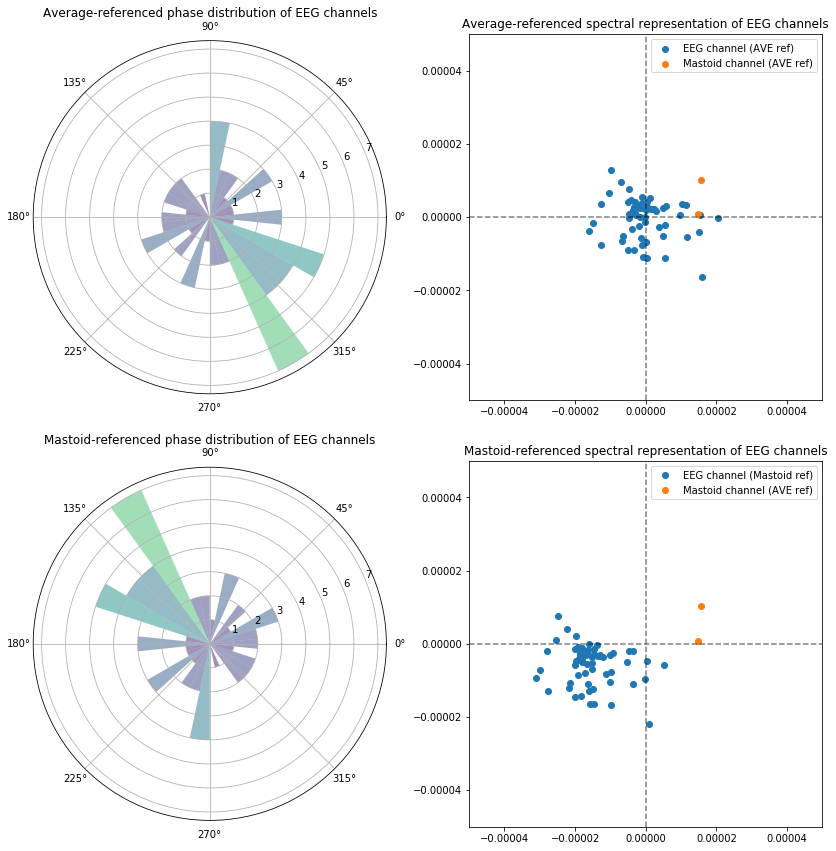

Extracting EDF parameters from /home/luxx0489/jupyter_projects/MultiChannelSSSR/EEG_data_100_200Hz/Sub16/Sub16_TMR-5_MSK_HF.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 4804607  =      0.000 ...  1173.000 secs...
Trigger channel has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
1500 events found
Event IDs: [1 2]
1500 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 1500 events and 4097 original time points ...
0 bad epochs dropped
EEG channel type selected for re-referencing
Applying a custom EEG reference.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.


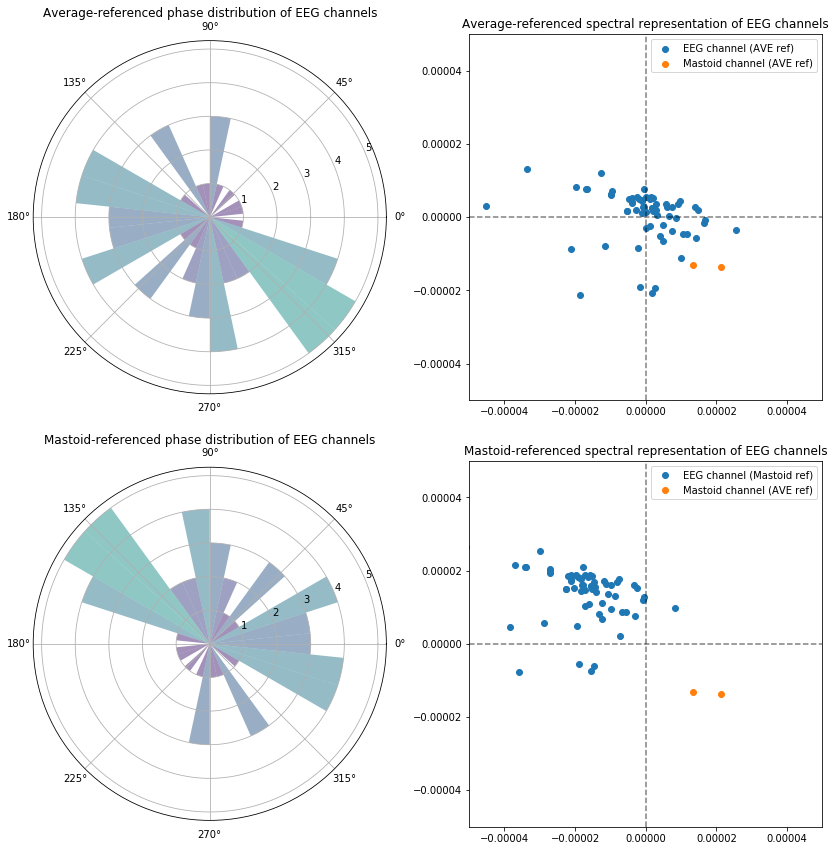

Extracting EDF parameters from /home/luxx0489/jupyter_projects/MultiChannelSSSR/EEG_data_100_200Hz/Sub17/Sub17_TMR-5_MSK_HF.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 4816895  =      0.000 ...  1176.000 secs...
Trigger channel has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
1500 events found
Event IDs: [1 2]
1500 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 1500 events and 4097 original time points ...
0 bad epochs dropped
EEG channel type selected for re-referencing
Applying a custom EEG reference.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.


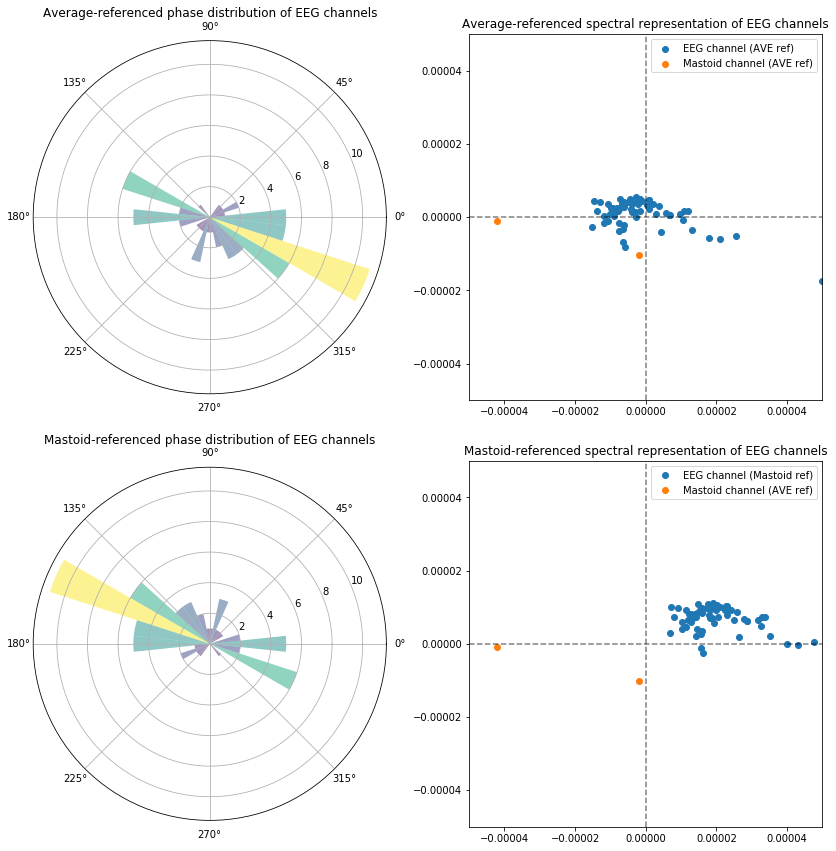

In [37]:
for iSubject in range(2,18):

    folder_path = "./jupyter_projects/MultiChannelSSSR/EEG_data_100_200Hz/"
    sub_id = 'Sub' + str(iSubject)
    raw = mne.io.read_raw_bdf(folder_path + sub_id + '/' + sub_id + '_TMR-5_MSK_HF.bdf',
                                   stim_channel='Status', preload=True, exclude = ['EXG3','EXG4','EXG5','EXG6','EXG7','EXG8'])
    events = mne.find_events(raw)

    epochs = mne.Epochs(raw,events=events, tmin=-0.5, tmax=0.5)
    epochs.load_data()
    ep_m = epochs.copy().set_eeg_reference(ref_channels=['EXG1','EXG2'])
    ep_a = epochs.copy().set_eeg_reference(ref_channels='average')

    data = ep_a.get_data()[:,:,int(np.round((0.5)*4096)):int(np.round((0.5+0.43752)*4096))]
    x1 = data[:,:,:]

    xw = np.fft.rfft(np.hamming(x1.shape[2])*x1, axis=2)
    xw_a = xw

    data = ep_m.get_data()[:,:,int(np.round((0.5)*4096)):int(np.round((0.5+0.43752)*4096))]
    x1 = data[:,:,:]

    xw = np.fft.rfft(np.hamming(x1.shape[2])*x1, axis=2)
    xw_m = xw

    freq = np.fft.rfftfreq(x1.shape[2],1/4096)
    index = np.argmin(abs(freq-233.13))

    plt.figure(figsize=(12,12))
    plt.subplot(2,2,1)

    phase=xw_a.mean(0)[:,index]

    N = 30

    frequency, bins = np.histogram(np.angle(phase[0:64]), bins=N, range=[-np.pi, np.pi])
    # Compute pie slices

    theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
    radii = frequency
    width = 2*np.pi / N

    ax = plt.subplot(221, projection='polar')
    bars = ax.bar(theta, radii, width=width, bottom=0.0)
    # Use custom colors and opacity
    for r, bar in zip(radii, bars):
        bar.set_facecolor(plt.cm.viridis(r/10 ))
        bar.set_alpha(0.5)
    ax.set_title('Average-referenced phase distribution of EEG channels')

    plt.subplot(2,2,2)
    phase_a=xw_a.mean(0)[:,index]

    plt.scatter(np.real(phase_a[0:64]),np.imag(phase_a[0:64]),label='EEG channel (AVE ref)')
    plt.scatter(np.real(phase_a[64:66]),np.imag(phase_a[64:66]),label='Mastoid channel (AVE ref)')
    plt.axvline(x=0,linestyle='--',alpha=0.5,color='k')
    plt.axhline(y=0,linestyle='--',alpha=0.5,color='k')
    plt.xlim(-0.00005,0.00005)
    plt.ylim(-0.00005,0.00005)
    plt.legend()
    plt.title('Average-referenced spectral representation of EEG channels')

    #=================

    freq = np.fft.rfftfreq(x1.shape[2],1/4096)


    N = 30

    frequency, bins = np.histogram(np.angle(phase[0:64]), bins=N, range=[-np.pi, np.pi])
    # Compute pie slices

    theta = np.linspace(-np.pi, np.pi, N, endpoint=False)
    radii = frequency
    width = 2*np.pi / N

    ax = plt.subplot(223, projection='polar')
    bars = ax.bar(theta, radii, width=width, bottom=0.0)

    # Use custom colors and opacity
    for r, bar in zip(radii, bars):
        bar.set_facecolor(plt.cm.viridis(r/10 ))
        bar.set_alpha(0.5)
    ax.set_title('Mastoid-referenced phase distribution of EEG channels')

    plt.subplot(2,2,4)

    phase_m=xw_m.mean(0)[:,index]

    plt.scatter(np.real(phase_m[0:64]),np.imag(phase_m[0:64]),label='EEG channel (Mastoid ref)')
    plt.scatter(np.real(phase_a[64:66]),np.imag(phase_a[64:66]),label='Mastoid channel (AVE ref)')
    plt.axvline(x=0,linestyle='--',alpha=0.5,color='k')
    plt.axhline(y=0,linestyle='--',alpha=0.5,color='k')
    plt.xlim(-0.00005,0.00005)
    plt.ylim(-0.00005,0.00005)
    plt.legend()
    plt.title('Mastoid-referenced spectral representation of EEG channels')

    plt.tight_layout()
    plt.show()